PlayerName
&Drew               Axes(0.125,0.2;0.775x0.68)
..I..((-_-))\../    Axes(0.125,0.2;0.775x0.68)
Accident`           Axes(0.125,0.2;0.775x0.68)
Anonymous           Axes(0.125,0.2;0.775x0.68)
Blüe                Axes(0.125,0.2;0.775x0.68)
                               ...            
«ßrø»dynam!st       Axes(0.125,0.2;0.775x0.68)
«ßîç»Loki           Axes(0.125,0.2;0.775x0.68)
«ßîç»WTzZz          Axes(0.125,0.2;0.775x0.68)
«ßîç»°Caffeine      Axes(0.125,0.2;0.775x0.68)
°»RàéP«°*           Axes(0.125,0.2;0.775x0.68)
Name: PacketLoss, Length: 75, dtype: object

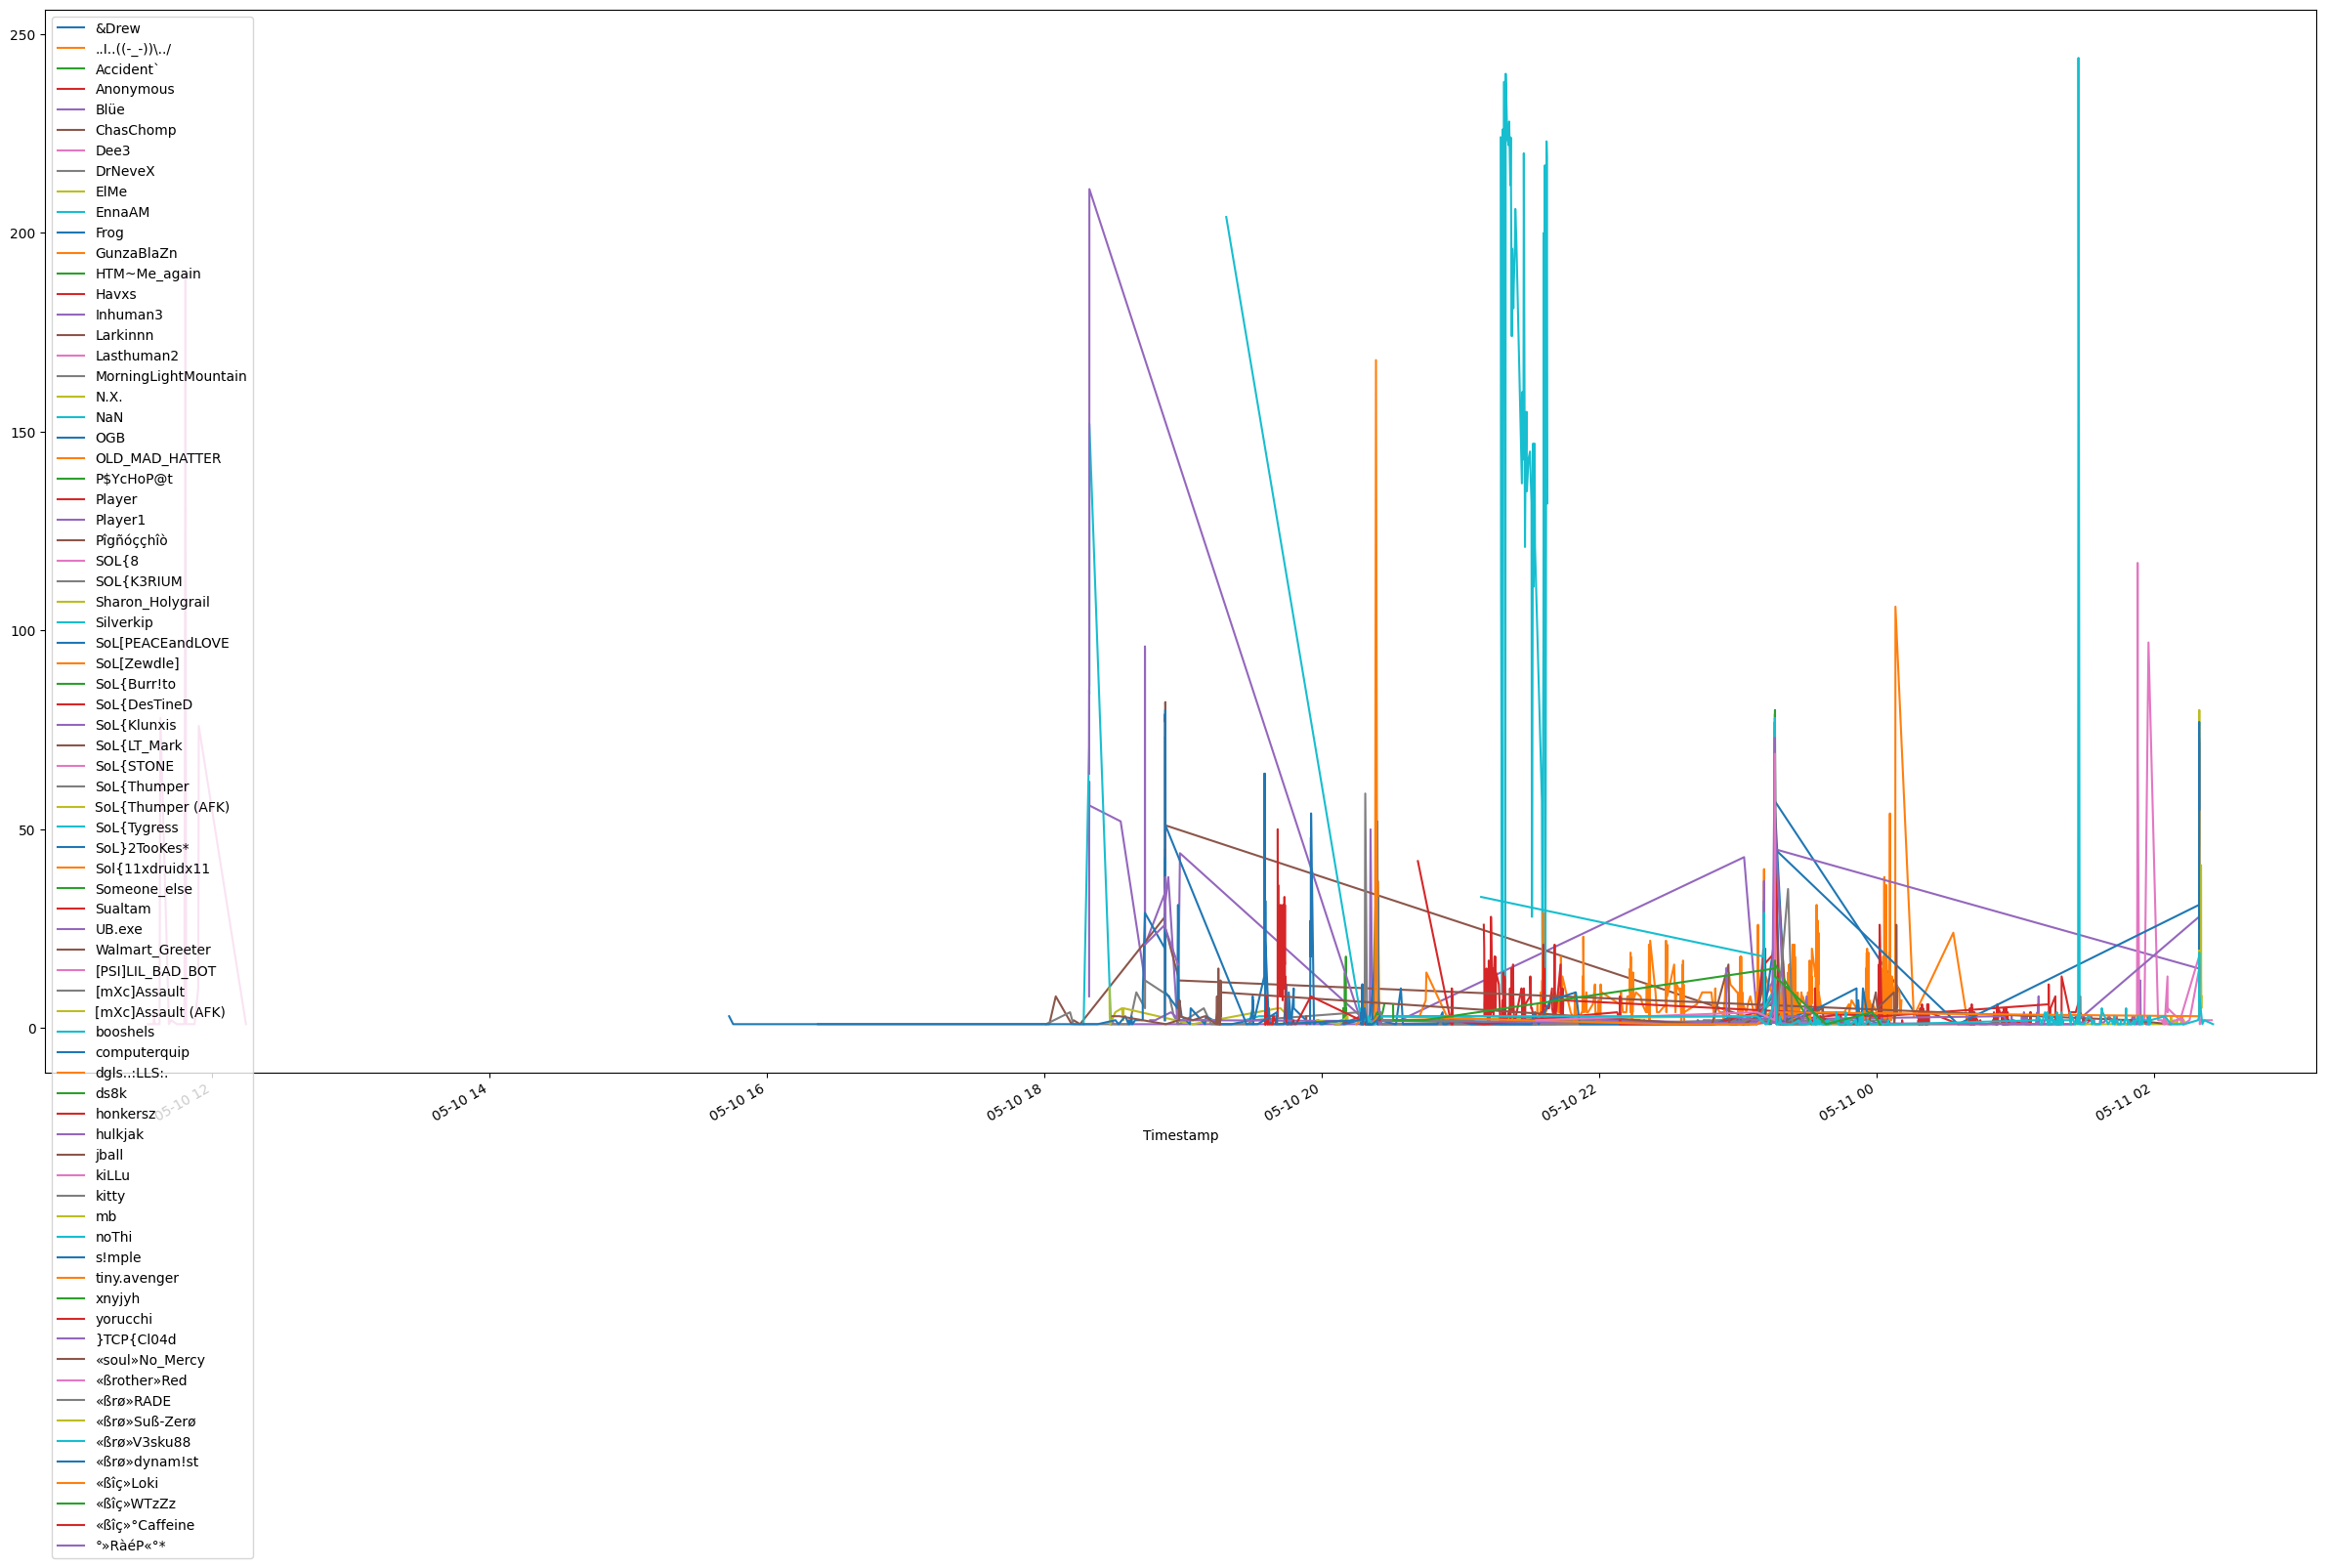

In [1]:
import duckdb
import pandas

conn = duckdb.connect(database=':memory:', read_only=False)
conn.execute("""
create table nmlog as select * from read_csv_auto('c:\\logs\\nmlog\\ut2004server\\*.csv', HEADER=true);
""")
result = conn.execute("""
select * from nmlog where ping > 0 and ping < 170 and PacketLoss > 0 
""").fetchall()
data = pandas.DataFrame.from_records(result, columns=['Timestamp', 'IP', 'PlayerName','Ping', 'PacketLoss'])
data.set_index('Timestamp').groupby('PlayerName')["PacketLoss"].plot(kind='line',legend=True, figsize=(30,16))
